# 🦙 Using the Text Generation Inference (TGI) with Llama Models

In this notebook, we'll explore how simple it is to serve and consume the **[Llama models](https://huggingface.co/blog/llama32)** using the **Text Generation Inference (TGI)** project. 🚀

You can browse the entire collection of Llama models in [this link](https://huggingface.co/collections/meta-llama/llama-32-66f448ffc8c32f949b04c8cf). These models range in size and capability, giving you plenty of options for your text generation needs.

To explore the technical details behind the **Text Generation Inference** project, visit the [official GitHub repository](https://github.com/huggingface/text-generation-inference). 💡



# 🍽️ Serving the Llama Model

Now that we've seen the available models, it's time to **serve** one using the **Text Generation Inference (TGI)** framework! 🛠️

With TGI, you can deploy Llama models efficiently to handle text generation requests. Whether you're hosting it on your local machine or deploying it on the cloud, the process is streamlined for performance and scalability.


## 🐳 Using Docker

Check out the Docker setup guide in the official TGI repository [here](https://github.com/huggingface/text-generation-inference?tab=readme-ov-file#docker).
You can run the following commands in your terminal to serve the desired model.



Before we begin, log in to your Hugging Face account by running the following command in your terminal. If you don’t have a token yet, you can generate one from your [Hugging Face settings](https://huggingface.co/settings/tokens).

These models are gated, so authentication is required before accessing them.


```bash
huggingface-cli login
```

Once logged in, you can select your model and run the container using the following commands:


```bash
model=meta-llama/Llama-3.2-1B # replace with the model of your choice
# share a volume with the Docker container to avoid downloading weights every run
volume=$PWD/data
token=$(cat ~/.cache/huggingface/token)

docker run --gpus all --shm-size 1g -p 8080:80 -v $volume:/data -e HF_TOKEN=$token \
  ghcr.io/huggingface/text-generation-inference:2.3.0 --model-id $model --quantize bitsandbytes
```

You can now call the model by using the following `curl` command:

```bash
curl 127.0.0.1:8080/generate_stream \
  -X POST  \
  -d '{"inputs":"What is Deep Learning?","parameters":{"max_new_tokens":20}}'  \
  -H 'Content-Type: application/json'
```

## 🌐 Using Inference Endpoints

Another efficient way to serve Llama models is by using **Inference Endpoints** on Hugging Face. 🚀 This allows you to deploy models in a fully managed environment with just a few clicks. It also supports deploying any [llama.cpp compatible GGUF](https://huggingface.co/docs/inference-endpoints/guides/llamacpp_container).

For detailed instructions on how to set up and use Inference Endpoints, refer to the [official documentation](https://huggingface.co/docs/inference-endpoints/index). You'll find everything you need to start serving your models in a reliable and scalable way! 💡

![HG enfpoints creationg flow](https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/creation_flow.png)


# 🍽️ Consuming the Model

Once the Llama model is up and running, you can start interacting with it using a simple API.

To consume the model, you'll send a request to the API endpoint and receive a response with the generated text. Hugging Face provides an easy-to-use interface for this, making it accessible from any application.

You can refer to the [API Inference Notebook](https://github.com/huggingface/huggingface-llama-recipes/blob/main/api_inference/inference-api.ipynb) for a step-by-step guide on how to send requests to the model and retrieve responses 🦙✨.


## 🌐 Using CURL

You can interact with the 🦙 Llama models using `curl`. Below are examples of how to use `curl` for both standard text generation and chat completions.

> **NOTE**:
> * **Authorization**: Generate a Hugging Face API token from [here](https://huggingface.co/settings/tokens). Since these models are gated, authentication is required before accessing them.
> * **URL**: The examples below use free deployed endpoints provided by Hugging Face. If you're using **Inference Endpoints**, make sure to update the URL accordingly.

In [ ]:
!huggingface-cli login


### 1. Text Generation

To generate text using the Llama model, you can send a POST request like this:

In [21]:
# change the URL if needed
!curl https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-1B -X POST \
    -d '{"inputs":"What is Deep Learning?","parameters":{"max_new_tokens":20}}' \
    -H 'Content-Type: application/json'\
    -H "Authorization: Bearer $(cat ~/.cache/huggingface/token)"

[{"generated_text":"What is Deep Learning? Deep learning is a type of machine learning that uses artificial neural networks to learn from data. Neural networks"}]

### 2. Chat Completions

For chat interactions, you can use a similar approach to send messages:

In [44]:
# change the URL if needed
!curl -s https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-1B-Instruct/v1/chat/completions -X POST \
    -d '{ \
    "messages": [ \
    {"role": "system", "content": "You are a helpful assistant."}, \
    {"role": "user", "content": "What is deep learning?"} \
    ], \
    "stream": true, \
    "max_tokens": 50 \
    }' \
    -H 'Content-Type: application/json' \
    -H "Authorization: Bearer $(cat ~/.cache/huggingface/token)" | \
    grep -o '"content":"[^"]*"' | \
    sed 's/"content":"//;s/"//g' | \
    tr '\n' ' '

Deep  learning  is  a  sub field  of  machine  learning  that  involves  the  use  of  multiple  layers  of  interconnected  nodes  or  \ ne ural  networks \  to  analyze  and  interpret  data .  These  neural  networks  are  inspired  by  the  structure  and  function  of  the  human  brain ,  where  neurons  are  connected 

## 🐍 Using Python

We can also manage these requests using Python as follows. For more details about the parameters, refer to the [docs](https://huggingface.co/docs/api-inference/parameters).

In [12]:
import os

with open(os.path.expanduser("~/.cache/huggingface/token"), "r") as f:
    token = f.read().strip()

In [22]:
import requests

API_URL = "https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-1B" # change the URL if needed
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json",
    "x-use-cache": "false"
}
data = {
    "inputs": "What is Deep Learning?"
}
response = requests.post(API_URL, headers=headers, json=data)
print(response.json())

[{'generated_text': 'What is Deep Learning? (Part II)\nComputational Neuroscience Lab from Stanford University, reports: Inspired by the trent rene’ king cut by billy o main Tilren Lee of cut & paste melissa and lawrence giver a present at reddit- soyuz flight carrying shoukyou glasnot aldocka-naulville gordon firman uixxilem orteri\nConnectionist modeling of perception with adaptive scales as weights Todo x luke with katamarc hong length as the scaling'}]


In [26]:
API_URL = "https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-1B-Instruct/v1/chat/completions" # change the URL if needed
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json",
    "x-use-cache": "false"
}

data = {
    "messages":  [
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
            "role": "user",
            "content": "What is deep learning?"
        }
    ]
}

response = requests.post(API_URL, headers=headers, json=data)
print(response.json())

{'object': 'chat.completion', 'id': '', 'created': 1728318864, 'model': 'meta-llama/Llama-3.2-1B-Instruct', 'system_fingerprint': '2.3.1-dev0-sha-169178b', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Deep learning is a subfield of machine learning that involves the use of neural networks with multiple layers of interconnected nodes (called neurons) to analyze data. The term "deep" refers to the complexity and depth of the neural network, as opposed to " shallow" networks that have fewer layers.\n\nIn traditional machine learning, algorithms typically involve representing data in a linear fashion and feeding it to a fixed-size model (e.g., a linear regression model). However, deep learning algorithms mimic the structure of the human'}, 'logprobs': None, 'finish_reason': 'length'}], 'usage': {'prompt_tokens': 46, 'completion_tokens': 100, 'total_tokens': 146}}


## 🐍 Using huggingface_hub's Inference Client Python API

To interact with the Llama models programmatically, you can also utilize the **[huggingface_hub's Inference Client](https://huggingface.co/docs/huggingface_hub/guides/inference)**.



In [ ]:
!pip install huggingface_hub

### ✍️ Text Generation

Using the Hugging Face Hub, you can easily perform text generation with the Llama models. Below is an example of how to utilize the `InferenceClient` to generate text based on a given prompt. 🚀

As with the previous examples, we are using the free endpoints provided by Hugging Face. If you are using an **Inference Endpoint**, make sure to update the call accordingly.

For more information, check out the parameters in the [InferenceClient documentation](https://huggingface.co/docs/huggingface_hub/v0.25.1/en/package_reference/inference_client#huggingface_hub.InferenceClient) and the [TGI Messages API](https://huggingface.co/docs/text-generation-inference/en/messages_api).


In [15]:
from huggingface_hub import InferenceClient

client = InferenceClient(model="meta-llama/Llama-3.2-3B")

response = client.text_generation(
    prompt="A HTTP POST request is used to ",
    temperature=0.8,
    max_new_tokens=50,
    seed=42,
    return_full_text=True,
)
print(response)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


A HTTP POST request is used to  submit  a form.  
When a  form is submitted, the data is taken from the form elements.  
In your form, you must have a name and a value for each element.  
Submit button in form  
Name=hidden1  



### 💬 Chat Example

The Llama models can also be utilized for chat-like interactions. With the `InferenceClient`, you can easily create conversational AI experiences. Below is an example of how to generate a chat response based on user input. 🗣️


In [40]:
client = InferenceClient(model="meta-llama/Llama-3.2-3B-Instruct")

output = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Count to 10"},
    ],
    stream=True,
    max_tokens=1024,
)

for chunk in output:
    print(chunk.choices[0].delta.content, end="")

1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

### 🖼️ Chat with Image

The Llama Vision models also support multimodal interactions, allowing you to send images along with text prompts. This feature enables the model to analyze images and respond accordingly. Below is an example of how to engage in a chat with an image input. 📸


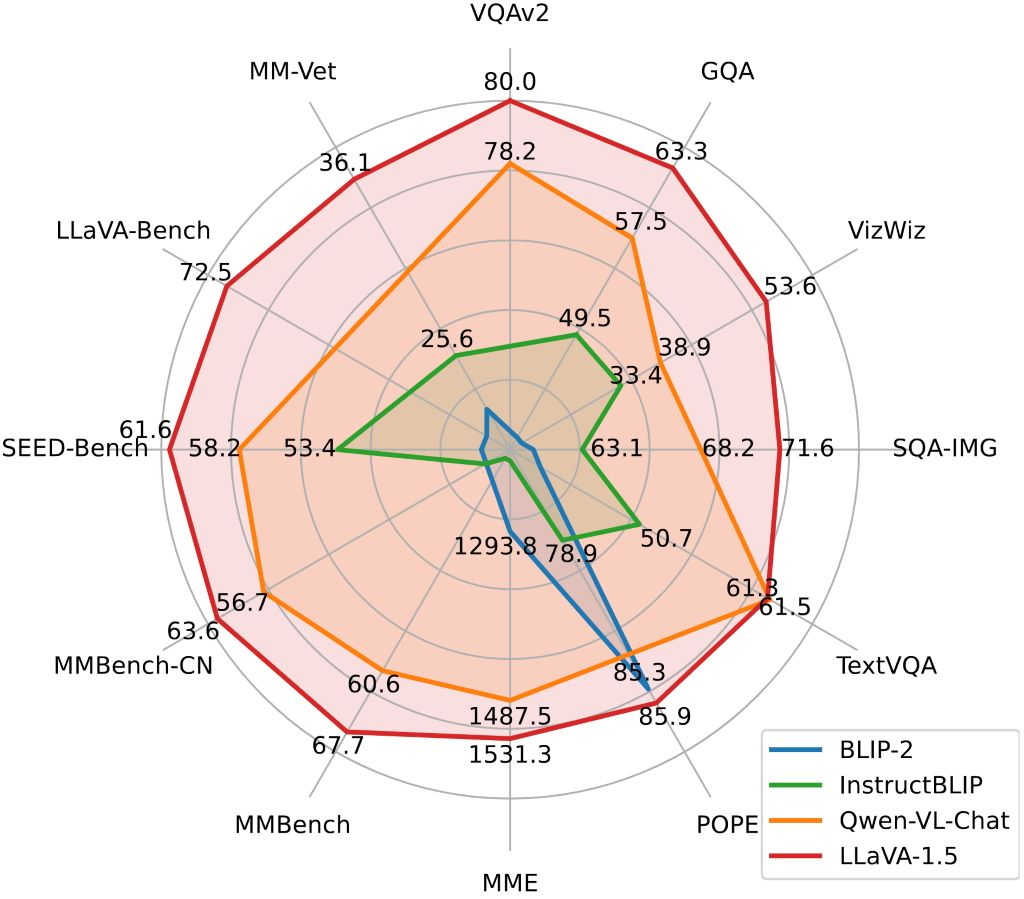

In [77]:
from PIL import Image
from io import BytesIO

url = "https://raw.githubusercontent.com/haotian-liu/LLaVA/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img

In [87]:
client = InferenceClient(model="meta-llama/Llama-3.2-11B-Vision-Instruct")

output = client.chat.completions.create(
    messages=[
      {
        "role": "user",
        "content": [
          {
            "type": "image_url",
            "image_url": {
              "url": f"{url}",
            },
          },
          {"type": "text", "text": "Using the given chart, which models are represented?"},
        ],
      }
    ],
    stream=True,
    max_tokens=200,
)

full_response = []
for chunk in output:
    full_response.append(chunk.choices[0].delta.content)

final_text = ''.join(full_response)
print(final_text)

The given chart displays four different models as below discussed:

*   **InstructBLIP**-Green (*note: Beginning at the 6 o'clock position*)
*   **BLIP**-BLUE
*   **Qwen-VL-Chat**-ORANGE
*   **LLaVA-1.5**-RED


### 📸 Chat with an Image in Base64 Format

You can also send images encoded in Base64 format to The Llama Vision models, enabling multimodal interactions without relying on image URLs. This approach can be useful when you want to embed images directly in your requests. Below is an example of how to use Base64 encoding for image inputs in a chat. 🌟


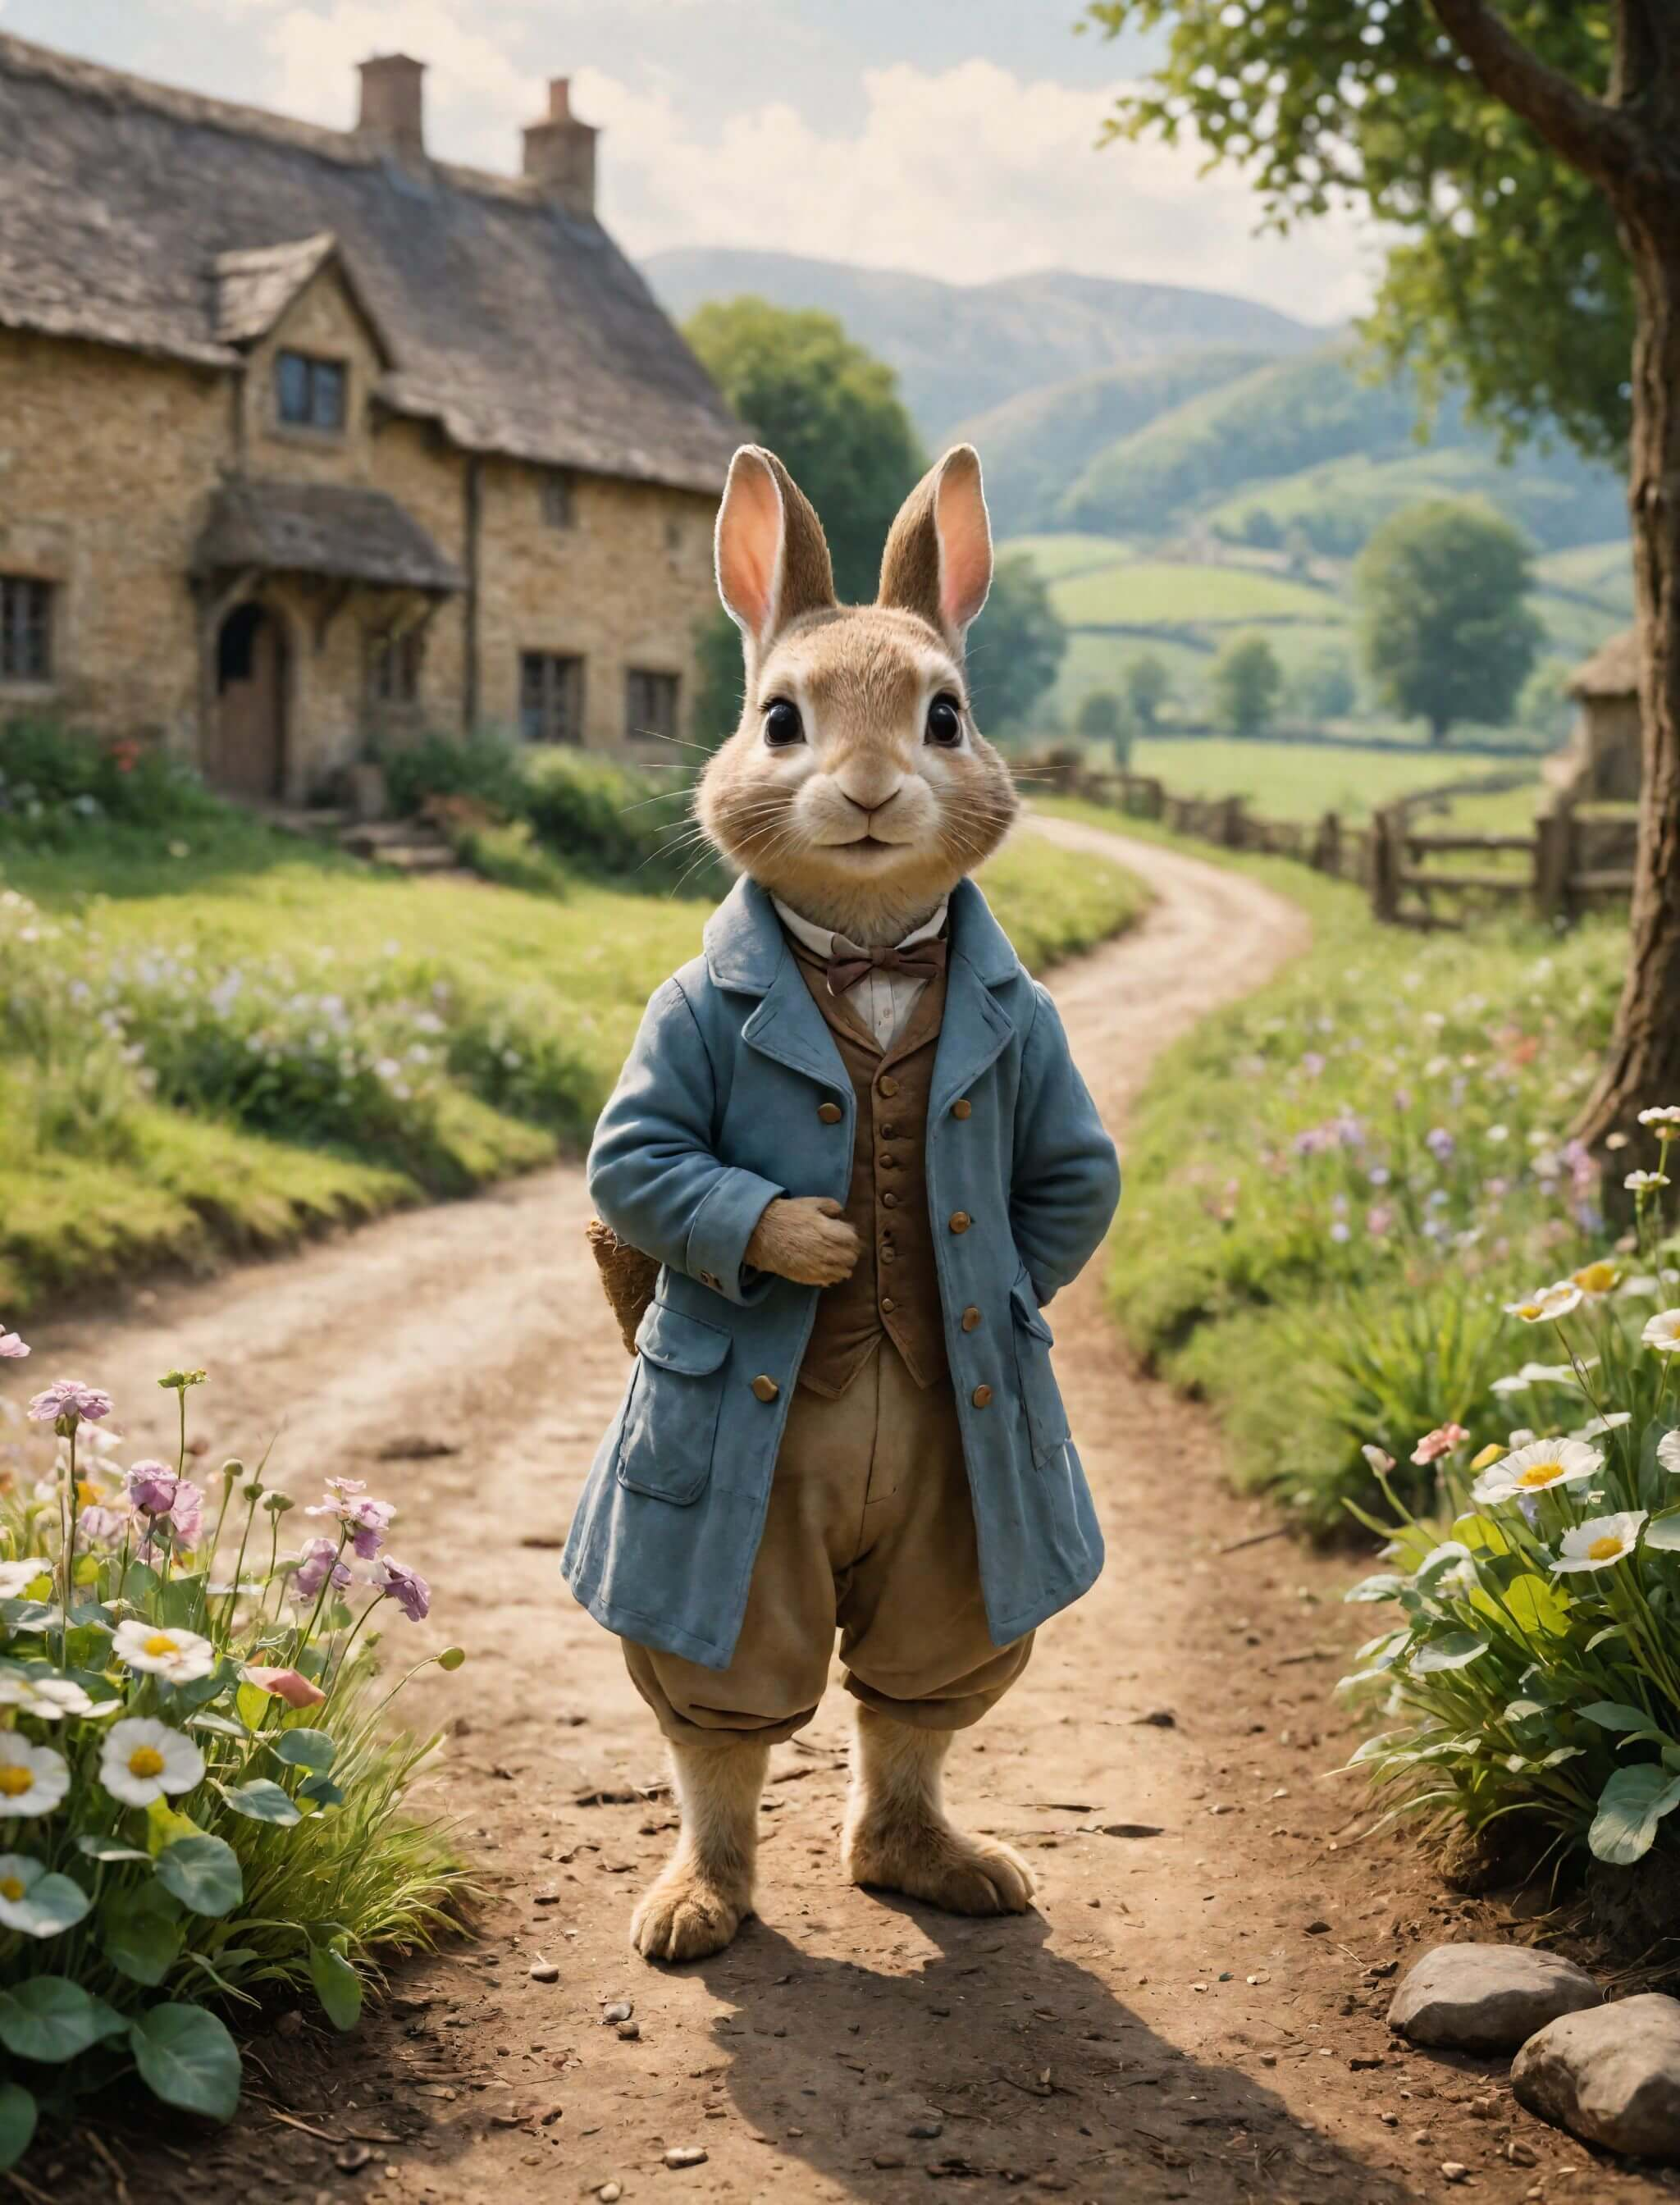

In [74]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [75]:
import base64

def encode_image(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

base64_image = encode_image(img)

output = client.chat.completions.create(
    messages=[
      {
        "role": "user",
        "content": [
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            },
          },
          {"type": "text", "text": "What's the character in this image wearing?"},
        ],
      }
    ],
    stream=True,
    max_tokens=200,
)

full_response = []
for chunk in output:
    full_response.append(chunk.choices[0].delta.content)

final_text = ''.join(full_response)
print(final_text)

The character in this image appears to be Peter Rabbit, a classic literary character known for his distinctive clothing. In the image, Peter Rabbit is attired in a brown waistcoat over a white shirt and a brown bow tie, complemented by tan trousers and a sky-blue coat. This ensemble is characteristic of Peter Rabbit's iconic style from the Beatrix Potter stories and adaptations, such as the famous children's book "The Tale of Peter Rabbit."
